In [1]:
import numpy as np
from IPython.display import display
from time import time
import matplotlib.pyplot as plt
import math

![](images/1.png)

In [2]:
def I(n):
    if n==0:
        return 0
    return n+1 + sum(I(i-1)+I(n-i) for i in range(1,n+1))/n


def f(n,C):
    return (n+1)/n*C+2

def II(n):
    if n==0:
        return 0
    return f(n,II(n-1))


In [3]:
print(II(3))
print(I(3))

8.666666666666666
8.666666666666668


![](images/2.png)

In [438]:
N1 = list(range(15))
N2 = list(range(0,300,20))
T=[[],[]]

for i in range(len(N1)):
    n=N1[i]
    t=time()
    I(n)
    t=time()-t
    T[0].append(t)
    
for i in range(len(N2)):
    n=N2[i]
    t=time()
    II(n)
    t=time()-t
    T[1].append(t)

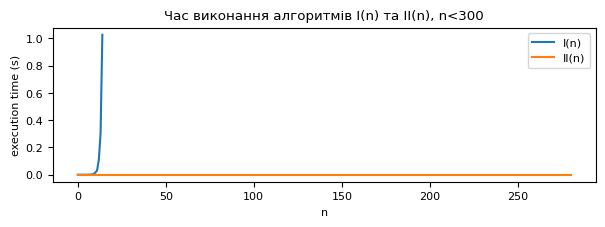

In [443]:
#а
plt.gcf().set_size_inches(7,2)
plt.plot(N1,T[0],label="I(n)")
plt.plot(N2,T[1],label="II(n)")
plt.legend()

plt.xlabel("n")
plt.ylabel("execution time (s)")
plt.title("Час виконання алгоритмів I(n) та II(n), n<300")
plt.show()


In [444]:
#b
count=100000
N = [None]*count
N[0]=0
for i in range(1,count):
    N[i]=f(i,N[i-1])

X = list(range(count))

def C(n):
    g=0.577
    return 2*(n+1)*(math.log(n+1)+g-1)

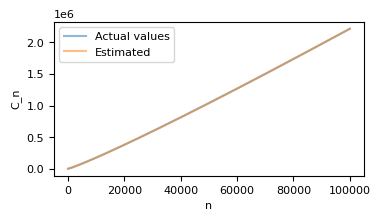

MSE = 664.2938597199325
n<=100000


In [445]:
plt.gcf().set_size_inches(4,2)
plt.plot(X,N,alpha=0.5,label="Actual values")
plt.plot(X,[C(x) for x in X],alpha=0.5,label="Estimated")
plt.legend()
plt.xlabel("n")
plt.ylabel("C_n")
plt.show()

mse = np.mean([pow(N[i]-C(X[i]),2) for i in range(len(X))])
print("MSE =",mse)
print("n<=%d"%count)

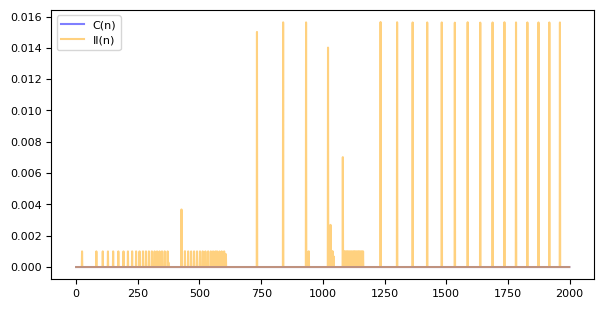

Mean excution time difference: 0.0001839381456375122(s)


In [447]:
#c
def C(n):
    g=0.577
    return 2*(n+1)*(log(n+1)+g+1)

N = list(range(2000))
T1=[]
T2=[]
for n in N:
    t1=time()
    C(n)
    t1=time()-t1
    T1.append(t1)
    
    t2=time()
    II(n)
    t2=time()-t2
    T2.append(t2)
    
plt.gcf().set_size_inches(7,3.5)
plt.plot(N,T1,color="blue",alpha=0.5,label="C(n)")
plt.plot(N,T2,color="orange",alpha=0.5,label="II(n)")
plt.legend()
MD=np.mean([T2[i]-T1[i] for i in range(len(T1))])
plt.show()
print("Mean excution time difference: %s(s)"%MD)

![](images/3.png)

In [8]:
def quick_sort(arr:list|tuple):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x <= pivot]
    right = [x for x in arr[1:] if x > pivot]
    return quick_sort(left)+[pivot]+quick_sort(right)

def merge_sort(arr:list|tuple):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left = merge_sort(left)
    right = merge_sort(right)

    return merge_lists(left, right)


def merge_lists(left:list|tuple, right:list|tuple):
    out = []
    i=0;
    j=0;
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            out.append(left[i])
            i += 1
            continue
        out.append(right[j])
        j += 1
    out += left[i:]
    out += right[j:]
    return out


In [9]:
def test_exec_time(n,count):
    arr = list(range(n))
    T1=[]
    T2=[]
    for _ in range(count):
        seed = np.random.randint(0,12041390)
        np.random.seed(seed)
        np.random.shuffle(arr)

        t1=time()
        quick_sort(arr)
        t1=time()-t1
        T1.append(t1)

        np.random.seed(seed)
        np.random.shuffle(arr)
        t2=time()
        merge_sort(arr)
        t2=time()-t2
        T2.append(t2)
    return np.mean(T1),np.mean(T2)
    

In [10]:
N = [int(1e4),int(1e5),int(1e6)]
c=3
T = [None]*len(N)
for i in range(len(N)):
    n=N[i]
    t1,t2=T[i]=test_exec_time(n,c)
    print("QuickSort (average): %f, n=%d, count=%d"%(t1,n,c))
    print("MergeSort (average): %f, n=%d, count=%d"%(t2,n,c))
    print()

QuickSort (average): 0.005102, n=10000, count=3
MergeSort (average): 0.028412, n=10000, count=3

QuickSort (average): 0.160549, n=100000, count=3
MergeSort (average): 0.254463, n=100000, count=3

QuickSort (average): 2.531276, n=1000000, count=3
MergeSort (average): 3.208214, n=1000000, count=3



![](images/4.png)

In [11]:
log=math.log
c_q=None
c_m=None

n0,t00 = N[0],T[0][0]
t01 = T[0][1]

n1,t10 = N[1],T[1][0]
t11 = T[1][1]

c_q = min(t00/n0*log(n0) , t01/n0*log(n0))
c_m = min(t10/n1*log(n1) , t11/n1*log(n1))

print("c_q = %s"%c_q)
print("c_m = %s"%c_m)

c_q = 4.699553594925871e-06
c_m = 1.8483896415389562e-05


In [12]:
n=1e6
print("QuickSort, estimated execution time for n=%.e:"%n,c_q*n*log(n))
print("Actual execution time: %f"%T[2][0])
print()
print("MergeSort, estimated execution time for n=%.e:"%n,c_m*n*log(n))
print("Actual execution time: %f"%T[2][1])
print()
n=1e7
print("QuickSort, estimated execution time for n=%.e:"%n,c_q*n*log(n))
print("MergeSort, estimated execution time for n=%.e:"%n,c_m*n*log(n))
mse = pow(c_q*n*log(n)-T[2][0],2)+pow(c_m*n*log(n)-T[2][1],2)
print("MSE = %s"%mse)
mse_thr = 1000
if mse>mse_thr:
    print("MSE > заданого максимально допустимого значення (%s) => прогноз недостатньо точний"%mse_thr)

QuickSort, estimated execution time for n=1e+06: 64.92673230841733
Actual execution time: 2.531276

MergeSort, estimated execution time for n=1e+06: 255.36446607913248
Actual execution time: 3.208214

QuickSort, estimated execution time for n=1e+07: 757.4785435982022
MergeSort, estimated execution time for n=1e+07: 2979.252104256546
MSE = 9426782.613686783
MSE > заданого максимально допустимого значення (1000) => прогноз недостатньо точний


![](images/5.png)

In [197]:
class QuickSortExperiment:
    def __init__(self,n_from,n_to,repeats=100):
        self.n_from=n_from
        self.n_to=n_to
        self.repeats=repeats
        
        self._QS_compares_X=[]
        self._QS_compares_Y=[]
        self._QS_compares_mean_X=[]
        self._QS_compares_mean_Y=[]
        self._QS_C_n_X=[]
        self._QS_C_n_Y=[]
        
    @staticmethod
    def quick_sort_modified(arr,c=0):
        if len(arr) <= 1:
            return arr,c
        pivot = arr[0]
        left = [x for x in arr[1:] if x <= pivot]
        right = [x for x in arr[1:] if x > pivot]
        a1,c1=quick_sort_modified(left,0)
        a2,c2=quick_sort_modified(right,0)
        return a1+[pivot]+a2,len(arr)+c1+c2
    
    def start(self):
        for n in range(self.n_from,self.n_to+1):
            QS_compares=[]
            lst = list(range(n))
            for _ in range(self.repeats):
                np.random.shuffle(lst)
                __,c=self.quick_sort_modified(lst,0)
                QS_compares.append(c)
            self.plot_append(n,QS_compares)
            
    def plot_append(self,n,QS_compares_lst):
        q=QS_compares_lst
        
        self._QS_compares_X+=[n]*len(q)
        self._QS_compares_Y+=q
        
        self._QS_compares_mean_X.append(n)
        self._QS_compares_mean_Y.append(np.mean(q))
        
        self._QS_C_n_X.append(n)
        self._QS_C_n_Y.append(C_arr[n])
        
    
    def plot(self):
        plt.gcf().set_size_inches(7,4)
        plt.scatter(self._QS_compares_X,self._QS_compares_Y,color="gray",s=1,label="QS compares")
        plt.plot(self._QS_compares_mean_X,self._QS_compares_mean_Y,color="black",label="mean of (QS combares) by n")
        plt.plot(self._QS_C_n_X,self._QS_C_n_Y,color="green",label="C_n")
        plt.legend()
        plt.show()
        


In [198]:
qse=QuickSortExperiment(1,200,repeats=15)
qse.start()

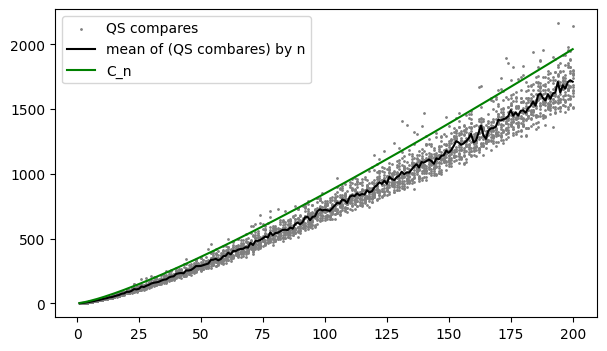

In [199]:
qse.plot()

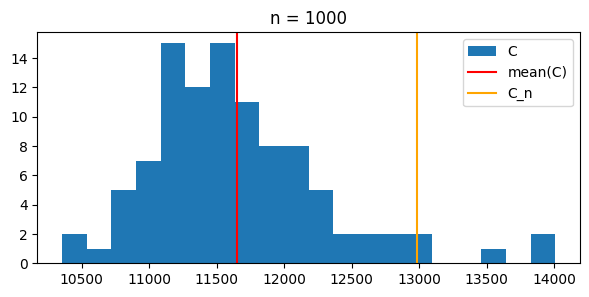

In [200]:
count=100
C = []
for _ in range(count):
    np.random.shuffle(lst)
    lst,c=quick_sort_modified(lst,0)
    C.append(c)
C_mean = np.mean(C)

plt.gcf().set_size_inches(7,3)
plt.hist(C,bins=20,label="С")
plt.axvline(C_mean,color="red",label="mean(С)")
plt.axvline(C_arr[n],label="C_n",color="orange")
plt.legend()
plt.title("n = %d"%n)
plt.show()

![](images/6.png)

In [406]:
from itertools import permutations

class SortEmpiricalHistogram:
    def __init__(self,n):
        self.n=n
        self.hist_QS=[]
        self.hist_MS=[]
        
    def get_permutations(self):
        return permutations(list(range(self.n)))
    
    @staticmethod
    def quick_sort_modified(arr,c=0):
        return QuickSortExperiment.quick_sort_modified(arr,c)
    
    @staticmethod
    def merge_sort_modified(arr,c=0):
        msort=SortEmpiricalHistogram.merge_sort_modified
        merge=SortEmpiricalHistogram.merge_lists
        if len(arr) <= 1:
            return arr,c

        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        left,c1 = msort(left)
        right,c2 = msort(right)
        merged,c3=merge(left, right)
        return merged,c1+c2+c3

    @staticmethod
    def merge_lists(left, right):
        out = []
        i=0;
        j=0;
        c=0;
        while i < len(left) and j < len(right):
            c+=1
            if left[i] < right[j]:
                out.append(left[i])
                i += 1
                continue
            out.append(right[j])
            j += 1
        out += left[i:]
        out += right[j:]
        return out,c
        
    @staticmethod
    def transposition_num(lst):
        return sum(1 if lst[i]<lst[i+1] else 0 for i in range(len(lst)-1))
    
    def start(self):
        for p in self.get_permutations():
            _,qs_c=self.quick_sort_modified([x for x in p])
            _,ms_c=self.merge_sort_modified([x for x in p])
            self.hist_QS.append(qs_c)
            self.hist_MS.append(ms_c)
            k=self.transposition_num(p)
        
    def plot(self,ax_QS,ax_MS):
        ax_QS.hist(self.hist_QS,label="QuickSort, n=%d"%self.n,bins=10,color="blue")
        ax_MS.hist(self.hist_MS,label="MergeSort, n=%d"%self.n,bins=10,color="orange")
        ax_QS.legend()
        ax_MS.legend()
        for ax in [ax_MS,ax_QS]:
            ax.set_ylabel("Permutations count", fontsize='small')
            ax.set_xlabel("Transpositions count", fontsize='small')

In [366]:
se9=SortEmpiricalHistogram(9)
se10=SortEmpiricalHistogram(10)

In [367]:
se9.start()

In [370]:
se10.start()

In [398]:
plt.rc('font', size=8)

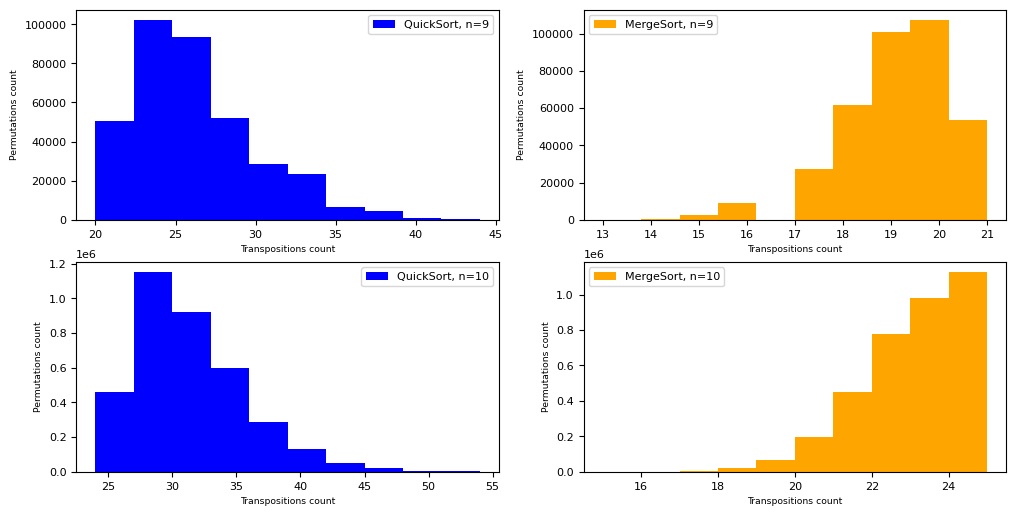

In [407]:
fig,ax=plt.subplots(2,2,figsize=(12,6))

SortEmpiricalHistogram.plot(se9,*ax[0])
SortEmpiricalHistogram.plot(se10,*ax[1])